# ACF and PACF

# 1. Imports

## 1.1 Packages

In [12]:
import sys

import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt

## 1.2 Options

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
sys.path.append('../src')

from velib_prediction.pipelines.train_model.mlflow import (  # noqa: E402
    create_mlflow_experiment,
)
from velib_prediction.pipelines.train_model.nodes import (  # noqa: E402
    get_split_train_val_cv,
    train_model_cv_mlflow,
)


## 1.3 Datasets

In [15]:
df_train = pd.read_parquet("../data/04_feature/df_feat_train.parquet")
df_train.sample(2)

,idx,stationcode,is_installed,capacity,numdocksavailable,numbikesavailable,mechanical,ebike,is_renting,is_returning,duedate,code_insee_commune,duedate_year,duedate_month,duedate_day,duedate_weekday,duedate_weekend
1,141111729431828,14111,1,25,18,5,2,3,1,1,2024-10-20 13:43:48+00:00,75056,2024,10,20,6,1
4,80261729868459,8026,1,12,8,2,1,1,1,1,2024-10-25 15:00:59+00:00,75056,2024,10,25,4,0


# 2. Prepare datasets

In [16]:
df_train.rename(columns={"numbikesavailable": "target"}, inplace=True)

In [17]:
list_df = get_split_train_val_cv(df_train, n_splits=3)

In [18]:
len(list_df)

3

In [19]:
df = list_df[0][0]
df['duedate'] = df['duedate'].dt.strftime('%Y-%m-%d %H')

In [20]:
df.sample(5)

,idx,stationcode,is_installed,capacity,numdocksavailable,target,mechanical,ebike,is_renting,is_returning,duedate,code_insee_commune,duedate_year,duedate_month,duedate_day,duedate_weekday,duedate_weekend
102,60031729568719,6003,1,21,13,7,4,3,1,1,2024-10-22 03,75056,2024,10,22,1,0
43,51101729857616,5110,1,23,6,17,7,10,1,1,2024-10-25 12,75056,2024,10,25,4,0
365,170261729471705,17026,1,40,19,19,12,7,1,1,2024-10-21 00,75056,2024,10,21,0,0
393,60031729778292,6003,1,21,5,15,11,4,1,1,2024-10-24 13,75056,2024,10,24,3,0
95,61081729431707,6108,1,17,7,10,8,2,1,1,2024-10-20 13,75056,2024,10,20,6,1


# 3. ACF and PACF

In [21]:
feat_date = "duedate"

/var/folders/q1/n9jt1sqj3976rqf2zn88_qpc0000gn/T/ipykernel_57651/713286399.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_analyze = df.loc[df["stationcode"].isin(station_codes_to_analyze)][(df["target"].notnull())].groupby([feat_date, "stationcode"])["target"].mean().reset_index().set_index(feat_date)
/Users/benjaminwallyn/Git/velib-prediction/.venv/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/Users/benjaminwallyn/Git/velib-prediction/.venv/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/Users/benjaminwallyn/Git/velib-prediction/.venv/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
/Users/benjaminwallyn/Git/velib-prediction/.venv/lib/python3.11

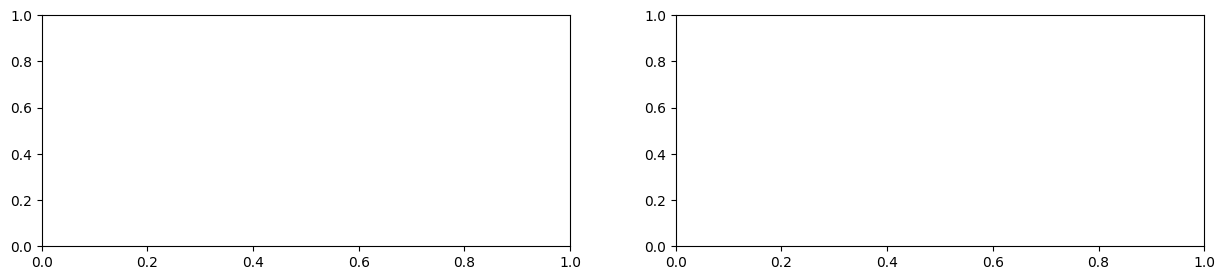

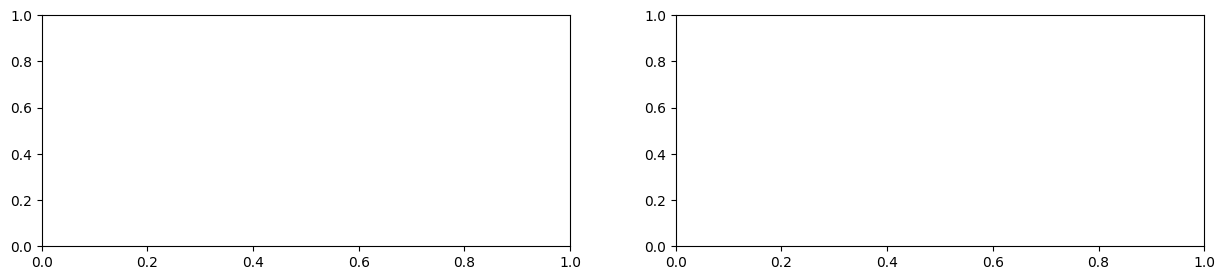

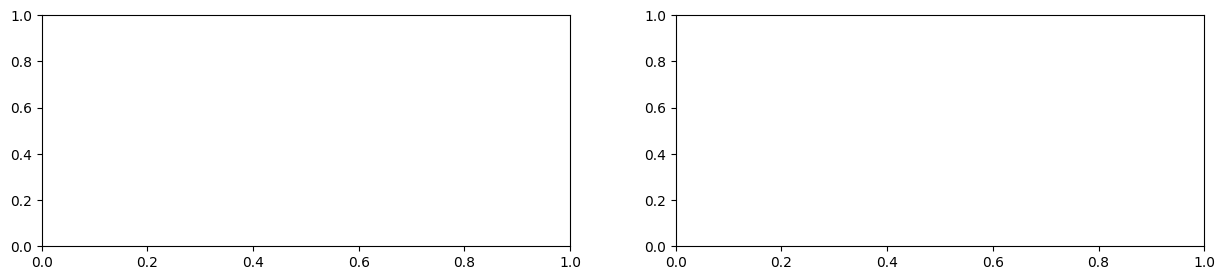

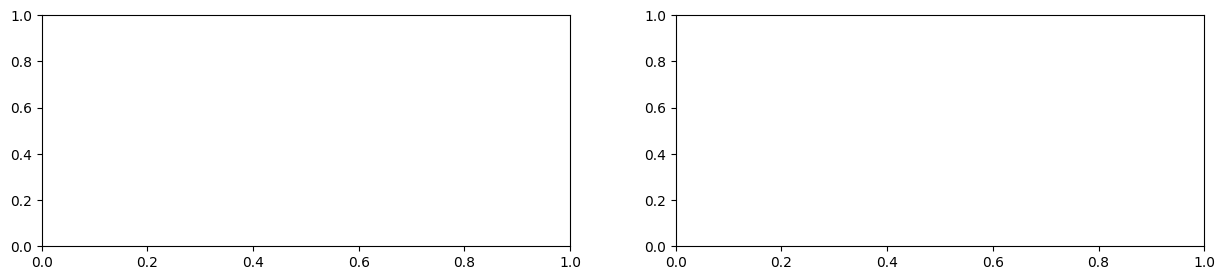

In [28]:
# Select random ids
station_codes_to_analyze = df["stationcode"].unique()[:4]

df_analyze = df.loc[df["stationcode"].isin(station_codes_to_analyze)][(df["target"].notnull())].groupby([feat_date, "stationcode"])["target"].mean().reset_index().set_index(feat_date)
for num, i in enumerate(df_analyze["stationcode"].unique()):
    try:
        fig, ax = plt.subplots(1,2,figsize=(15,3))
        temp = df_analyze[(df_analyze["stationcode"] == i)]
        sm.graphics.tsa.plot_acf(temp["stationcode"], lags=150, ax=ax[0], title = "AUTOCORRELATION\n" + i)
        sm.graphics.tsa.plot_pacf(temp["stationcode"], lags=150, ax=ax[1], title = "PARTIAL AUTOCORRELATION\n" + i)
    except Exception:
        pass

In [29]:
df_analyze

,stationcode,target
duedate,,
2024-10-19 15,14014,22.0
2024-10-19 15,16107,5.0
2024-10-19 21,14014,17.0
2024-10-19 21,14111,11.0
2024-10-19 21,9020,6.0
...,...,...
2024-10-26 09,14111,4.0
2024-10-26 10,16107,5.0
2024-10-26 10,9020,1.0
